In [17]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv("data/training_set_VU_DM.csv")
dataset.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [3]:
df = dataset.loc[dataset["prop_id"] == 104517]
df = df.loc[df["srch_room_count"] == 1]
df = df.loc[df["visitor_location_country_id"] == 219]
df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
df

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0
10135,2013-01-26 11:34:23,72.0,116,0
10560,2013-04-29 09:39:50,246.0,245,0
...,...,...,...,...
4947549,2013-02-15 14:43:38,113.0,90,1
4950075,2013-01-28 11:20:17,97.0,3,1
4950894,2013-05-05 22:01:43,133.0,40,1
4952309,2013-03-04 19:14:21,80.0,71,0


In [4]:
df["price_usd"].describe()

count    1545.000000
mean      113.890071
std       149.901492
min        37.000000
25%        67.000000
50%       100.000000
75%       140.000000
max      5584.000000
Name: price_usd, dtype: float64

In [5]:
dataset.loc[(dataset['price_usd'] == 5584) & (dataset['visitor_location_country_id'] == 219)]

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
2905344,195154,2013-04-07 20:59:07,5,219,NaN,NaN,219,104517,4,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,28.0,0,NaN,0


In [6]:
df = df.loc[df['price_usd'] < 5584]
df

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0
10135,2013-01-26 11:34:23,72.0,116,0
10560,2013-04-29 09:39:50,246.0,245,0
...,...,...,...,...
4947549,2013-02-15 14:43:38,113.0,90,1
4950075,2013-01-28 11:20:17,97.0,3,1
4950894,2013-05-05 22:01:43,133.0,40,1
4952309,2013-03-04 19:14:21,80.0,71,0


Text(0.5, 1.0, 'Time Series of room price by data time')

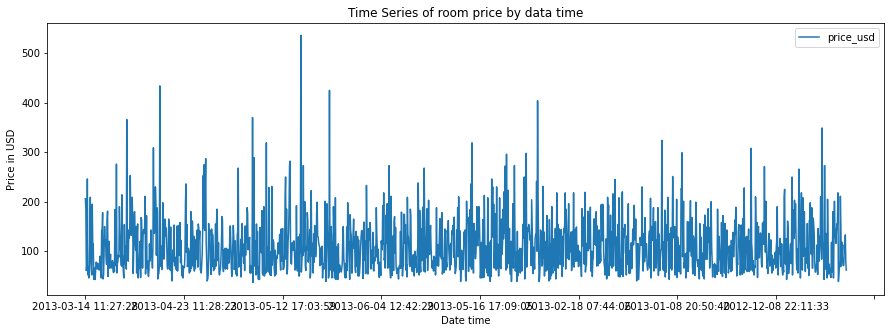

In [7]:
df.plot(x='date_time', y = 'price_usd', figsize = (15,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by data time')

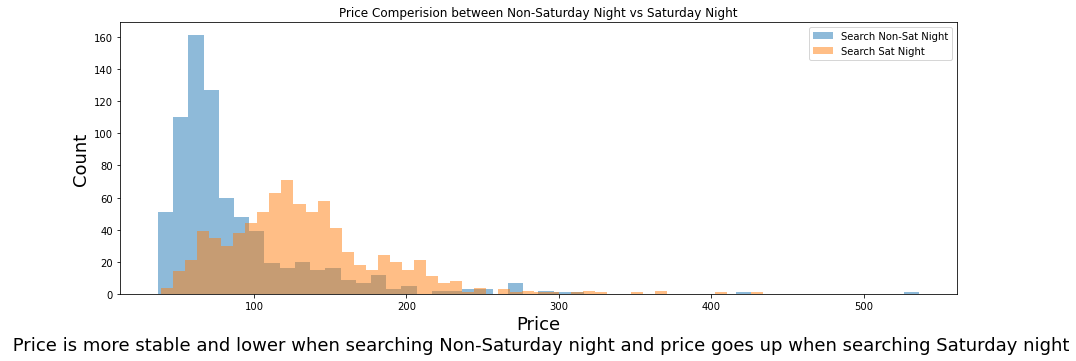

In [8]:
t = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
f = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']
plt.figure(figsize=(15, 5))
plt.hist(t, bins = 50, alpha=0.5, label='Search Non-Sat Night')
plt.hist(f, bins = 50, alpha=0.5, label='Search Sat Night')
plt.legend(loc='upper right')
plt.xlabel('Price\n Price is more stable and lower when searching Non-Saturday night and price goes up when searching Saturday night', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title("Price Comperision between Non-Saturday Night vs Saturday Night")
plt.show()

Text(0.5, 1.0, 'Saturday Night')

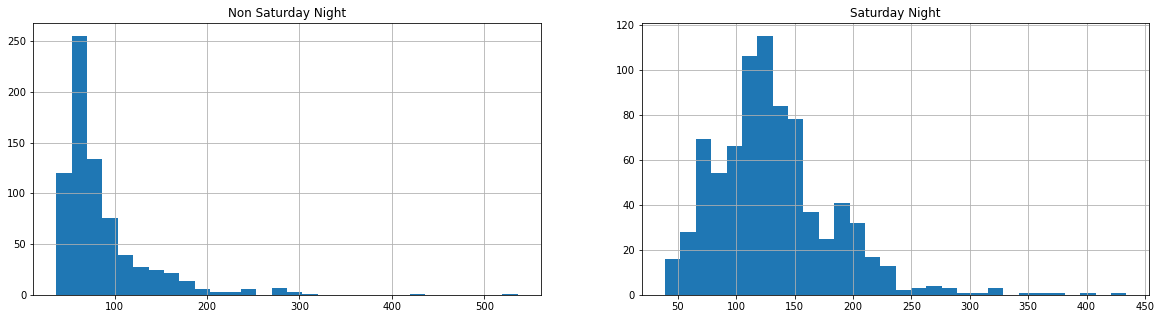

In [9]:
df_class0 = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
df_class1 = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

fig, axs = plt.subplots(1,2, figsize= (20,5))
df_class0.hist(ax=axs[0], bins=30)
df_class1.hist(ax=axs[1], bins=30)
axs[0].set_title("Non Saturday Night")
axs[1].set_title("Saturday Night")